In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import glob as gb
import cv2
import matplotlib.pylab as plt
plt.style.use('ggplot')

### Dataset source: https://www.kaggle.com/datasets/annielu21/house-rooms

In [2]:
import warnings

warnings.filterwarnings("ignore", message="All log messages before absl::InitializeLog() is called are written to STDERR")
warnings.filterwarnings("ignore", message="Fallback to op-by-op mode because memset node breaks graph update")

In [3]:
from sklearn.model_selection import train_test_split
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

2024-06-28 08:35:36.422018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 08:35:36.422163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 08:35:36.713997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
def set_random_seed(random_seed):
    random.seed(random_seed)
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)
    os.environ['PYTHONHASHSEED'] = str(random_seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [5]:
set_random_seed(42)

In [6]:
# Path gambar
img_path = '/kaggle/input/processed-room-image/clahe_processed_images'

input_dir = 'images'
output_dir = 'output'

# Membuat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)

In [7]:
# Membuat Folder Kategori
categories = ['bathroom', 'bedroom', 'dining', 'gaming', 
              'kitchen','laundry','living', 'office',
             'terrace', 'yard']

for category in categories:
    category_dir = os.path.join(output_dir, category)
    os.makedirs(category_dir, exist_ok=True)

In [8]:
# Memindahkan file ke folder yang dipilih
for root, dirs, files in os.walk(img_path):
    for file in files:
        category = os.path.basename(root)
        if category in categories:
            source_file = os.path.join(root, file)
            destination_dir = os.path.join(output_dir, category)
            shutil.copy(source_file, destination_dir)

# Menampilkan jumlah file dalam setiap kategori
for category in categories:
    category_dir = os.path.join(output_dir, category)
    num_files = len(os.listdir(category_dir))
    print(f"Total {category} files: {num_files}")

Total bathroom files: 740
Total bedroom files: 1083
Total dining files: 1178
Total gaming files: 1511
Total kitchen files: 1208
Total laundry files: 1589
Total living files: 1164
Total office files: 1241
Total terrace files: 1210
Total yard files: 1398


In [9]:
# Buat folder train, validation, dan test
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
    
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split data menjadi train, validation, dan test
for category in categories:
    category_dir = os.path.join(output_dir, category)
    images = os.listdir(category_dir)
    
    # Pembagian train, validation, test (70%, 15%, 15%)
    train_images, val_test_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(val_test_images, test_size=0.5, random_state=42)
    
    # Pindahkan gambar-gambar ke dalam folder train, validation, dan test
    for img in train_images:
        target_dir = os.path.join(train_dir, category)
        os.makedirs(target_dir, exist_ok=True)
        shutil.move(os.path.join(category_dir, img), os.path.join(target_dir, img))

    for img in val_images:
        target_dir = os.path.join(val_dir, category)
        os.makedirs(target_dir, exist_ok=True)
        shutil.move(os.path.join(category_dir, img), os.path.join(target_dir, img))
        
    for img in test_images:
        target_dir = os.path.join(test_dir, category)
        os.makedirs(target_dir, exist_ok=True)
        shutil.move(os.path.join(category_dir, img), os.path.join(target_dir, img))

In [10]:
# Cetak jumlah gambar dalam folder train
print("\nJumlah Gambar dalam Folder Train:")
for category in categories:
    train_category_dir = os.path.join(train_dir, category)
    num_train_images = len(os.listdir(train_category_dir))
    print(f"{category}: {num_train_images} gambar")

# Cetak jumlah gambar dalam folder validation
print("\nJumlah Gambar dalam Folder Validation:")
for category in categories:
    val_category_dir = os.path.join(val_dir, category)
    num_val_images = len(os.listdir(val_category_dir))
    print(f"{category}: {num_val_images} gambar")

# Cetak jumlah gambar dalam folder test
print("\nJumlah Gambar dalam Folder Test:")
for category in categories:
    test_category_dir = os.path.join(test_dir, category)
    num_test_images = len(os.listdir(test_category_dir))
    print(f"{category}: {num_test_images} gambar")


Jumlah Gambar dalam Folder Train:
bathroom: 444 gambar
bedroom: 649 gambar
dining: 706 gambar
gaming: 906 gambar
kitchen: 724 gambar
laundry: 953 gambar
living: 698 gambar
office: 744 gambar
terrace: 726 gambar
yard: 838 gambar

Jumlah Gambar dalam Folder Validation:
bathroom: 148 gambar
bedroom: 217 gambar
dining: 236 gambar
gaming: 302 gambar
kitchen: 242 gambar
laundry: 318 gambar
living: 233 gambar
office: 248 gambar
terrace: 242 gambar
yard: 280 gambar

Jumlah Gambar dalam Folder Test:
bathroom: 148 gambar
bedroom: 217 gambar
dining: 236 gambar
gaming: 303 gambar
kitchen: 242 gambar
laundry: 318 gambar
living: 233 gambar
office: 249 gambar
terrace: 242 gambar
yard: 280 gambar


Visualizing Images for Categories:

Contoh Gambar untuk Kategori gaming:


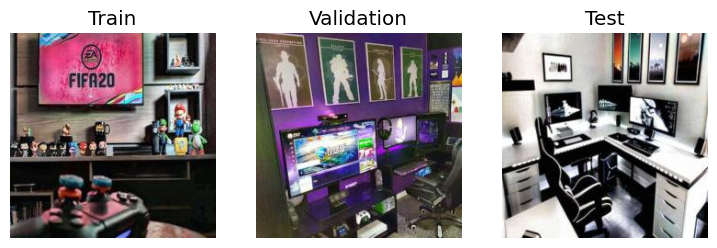


Contoh Gambar untuk Kategori laundry:


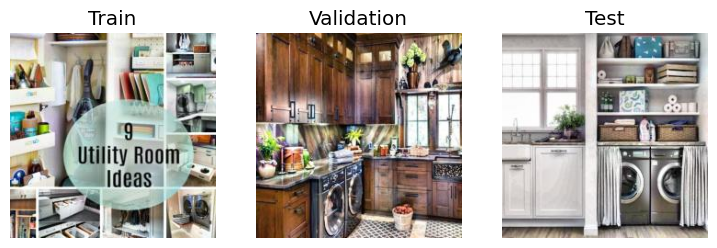


Contoh Gambar untuk Kategori bathroom:


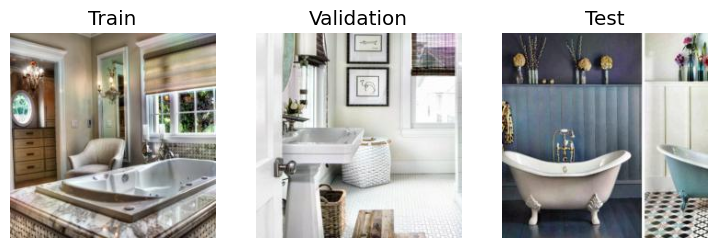


Contoh Gambar untuk Kategori living:


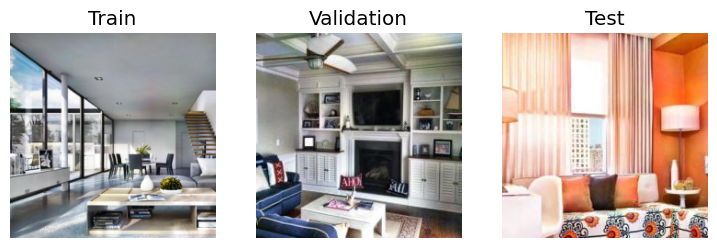


Contoh Gambar untuk Kategori office:


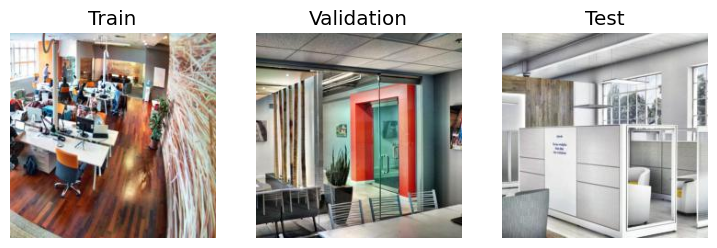


Contoh Gambar untuk Kategori yard:


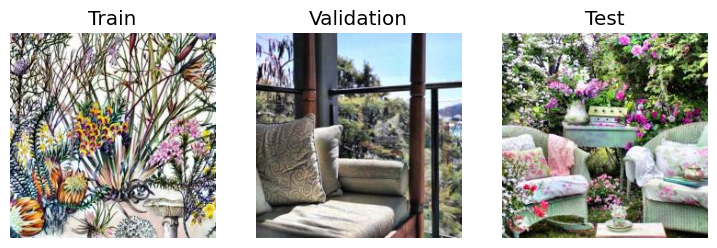


Contoh Gambar untuk Kategori terrace:


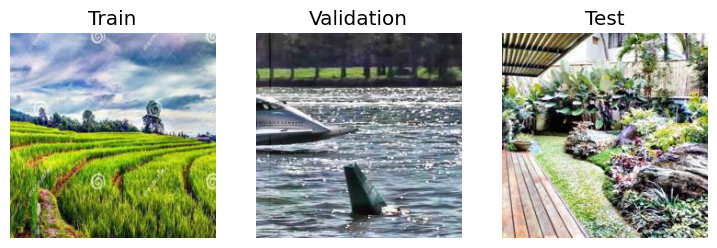


Contoh Gambar untuk Kategori bedroom:


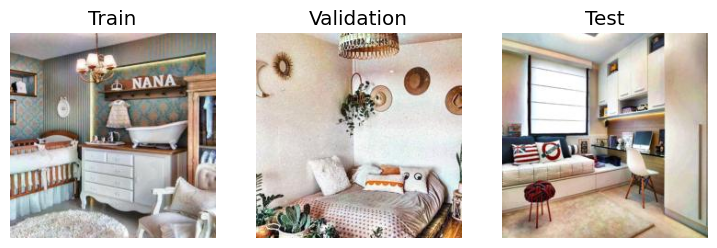


Contoh Gambar untuk Kategori dining:


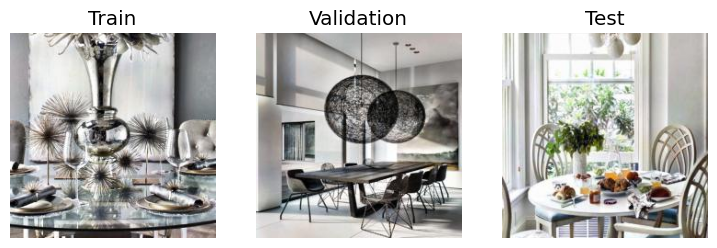


Contoh Gambar untuk Kategori kitchen:


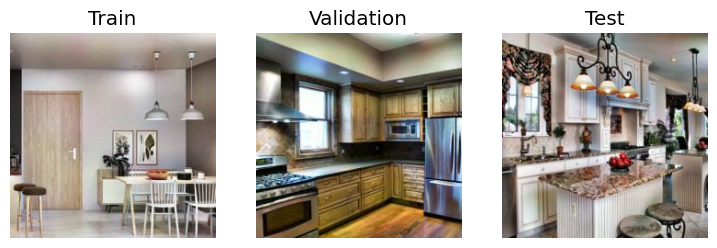

In [11]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_random_images(train_folder, val_folder, test_folder, num_images=1, figsize=(4, 4)):
    categories = os.listdir(train_folder)
    
    for category in categories:
        print(f"\nContoh Gambar untuk Kategori {category}:")
        fig, axes = plt.subplots(1, 3, figsize=(figsize[0] * 3, figsize[1]))

        folders = [train_folder, val_folder, test_folder]
        folder_names = ['Train', 'Validation', 'Test']
        
        for ax, folder, folder_name in zip(axes, folders, folder_names):
            category_dir = os.path.join(folder, category)
            images = os.listdir(category_dir)
            if len(images) > 0:
                img_file = random.choice(images)
                img_path = os.path.join(category_dir, img_file)
                img = mpimg.imread(img_path)
                ax.imshow(img)
                ax.axis("off")
                ax.set_title(folder_name)
            else:
                ax.axis("off")
                ax.set_title(f"No Images in {folder_name}")
        
        plt.show()

print('Visualizing Images for Categories:')
visualize_random_images(train_dir, val_dir, test_dir, figsize=(3, 3))

In [12]:
# Preprocess input images using MobilenetV3 preprocessing layers
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

# Menggunakan ImageDataGenerator untuk pelatihan 
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    rotation_range=10, 
    zoom_range=0.1,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,  
    vertical_flip=False,
    fill_mode='nearest'
)

traindata = train_datagen.flow_from_directory(
    directory=train_dir, 
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    shuffle=True)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255
)

valdata = val_datagen.flow_from_directory(
    directory=val_dir, 
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    shuffle=False)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255
)

testdata = test_datagen.flow_from_directory(
    directory=test_dir, 
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    shuffle=False)

Found 7383 images belonging to 10 classes.
Found 2462 images belonging to 10 classes.
Found 2466 images belonging to 10 classes.


In [13]:
print("Informasi Data Training:")
print(f"Jumlah sampel: {traindata.samples}")
print(f"Kelas: {traindata.class_indices}")
print(f"Shape gambar: {traindata.image_shape}")
print(f"Mode warna: {traindata.color_mode}")

print("\nInformasi Data Validasi:")
print(f"Jumlah sampel: {valdata.samples}")
print(f"Kelas: {valdata.class_indices}")
print(f"Shape gambar: {valdata.image_shape}")
print(f"Mode warna: {valdata.color_mode}")

print("\nInformasi Data Test:")
print(f"Jumlah sampel: {testdata.samples}")
print(f"Kelas: {testdata.class_indices}")
print(f"Shape gambar: {testdata.image_shape}")
print(f"Mode warna: {testdata.color_mode}")

Informasi Data Training:
Jumlah sampel: 7383
Kelas: {'bathroom': 0, 'bedroom': 1, 'dining': 2, 'gaming': 3, 'kitchen': 4, 'laundry': 5, 'living': 6, 'office': 7, 'terrace': 8, 'yard': 9}
Shape gambar: (224, 224, 3)
Mode warna: rgb

Informasi Data Validasi:
Jumlah sampel: 2462
Kelas: {'bathroom': 0, 'bedroom': 1, 'dining': 2, 'gaming': 3, 'kitchen': 4, 'laundry': 5, 'living': 6, 'office': 7, 'terrace': 8, 'yard': 9}
Shape gambar: (224, 224, 3)
Mode warna: rgb

Informasi Data Test:
Jumlah sampel: 2466
Kelas: {'bathroom': 0, 'bedroom': 1, 'dining': 2, 'gaming': 3, 'kitchen': 4, 'laundry': 5, 'living': 6, 'office': 7, 'terrace': 8, 'yard': 9}
Shape gambar: (224, 224, 3)
Mode warna: rgb


### MODELING

In [14]:
from tensorflow.keras.applications import MobileNetV3Small

base_model = MobileNetV3Small(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Freeze layers except the last 8 layers
for layer in base_model.layers[:-8]:
    layer.trainable = False

In [16]:
# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Set memory growth for GPU
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [19]:
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
import tensorflow as tf


# Definisi model
model = Sequential()
model.add(Input(shape=(224, 224, 3)))
model.add(base_model)
model.add(Conv2D(512, (3, 3), activation='elu', kernel_regularizer=l2(0.1)))
model.add(Conv2D(256, (3, 3), activation='elu', kernel_regularizer=l2(0.1)))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='elu', kernel_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='elu', kernel_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(len(categories), activation='softmax'))


model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobilenetV3small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 512)      │     2,654,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,566,842 (21.24 MB)

 Trainable params: 4,739,658 (18.08 MB)

 Non-trainable params: 827,184 (3.16 MB)

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

device_name = tf.test.gpu_device_name()
modelpath = './output/bestmodel.keras'


### train the model
with tf.device(device_name):
    
    optimizer = RMSprop(learning_rate=0.0001)
    
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'])
    
    # Early stopping for val_accuracy
    early_stopping_acc = EarlyStopping(monitor='val_accuracy', patience=10, 
                                       restore_best_weights=True, mode='max')

    # Early stopping for val_loss
    early_stopping_loss = EarlyStopping(monitor='val_loss', patience=5, 
                                        restore_best_weights=True, mode='min')

    
    # Reduce learning rate when a metric has stopped improving
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, 
                                  patience=4, min_lr=0.000005, verbose=1)

    
    # Callback ModelCheckpoint untuk menyimpan bobot terbaik
    checkpoint = ModelCheckpoint(
        modelpath,
        monitor='val_accuracy',
        save_best_only=True,  # Hanya menyimpan bobot terbaik
        mode='max',  # Mode untuk membandingkan nilai metrik (misalnya 'max' untuk akurasi)
        verbose=1  # Menampilkan pesan saat menyimpan
    )

    # Train the model
    history = model.fit(x=traindata, validation_data=valdata, epochs=200, 
                        batch_size=64, callbacks=[early_stopping_acc, early_stopping_loss,
                                                  checkpoint])

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/231 ━━━━━━━━━━━━━━━━━━━━ 1:11:13 19s/step - accuracy: 0.1875 - loss: 199.8243

I0000 00:00:1719564037.423454     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


230/231 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.1563 - loss: 133.2461
Epoch 1: val_accuracy improved from -inf to 0.11373, saving model to ./output/bestmodel.keras
231/231 ━━━━━━━━━━━━━━━━━━━━ 123s 452ms/step - accuracy: 0.1565 - loss: 132.8783 - val_accuracy: 0.1137 - val_loss: 32.4953
Epoch 2/200
230/231 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.2124 - loss: 22.5764
Epoch 2: val_accuracy improved from 0.11373 to 0.13241, saving model to ./output/bestmodel.keras
231/231 ━━━━━━━━━━━━━━━━━━━━ 91s 384ms/step - accuracy: 0.2124 - loss: 22.5149 - val_accuracy: 0.1324 - val_loss: 5.4473
Epoch 3/200
230/231 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.2104 - loss: 3.8079
Epoch 3: val_accuracy improved from 0.13241 to 0.14054, saving model to ./output/bestmodel.keras
231/231 ━━━━━━━━━━━━━━━━━━━━ 92s 389ms/step - accuracy: 0.2104 - loss: 3.8008 - val_accuracy: 0.1405 - val_loss: 2.3815
Epoch 4/200
230/231 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.2165 - loss: 2.2164


In [21]:
# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(testdata)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.1465 - loss: 2.3762
Test Loss: 2.3591
Test Accuracy: 12.25%


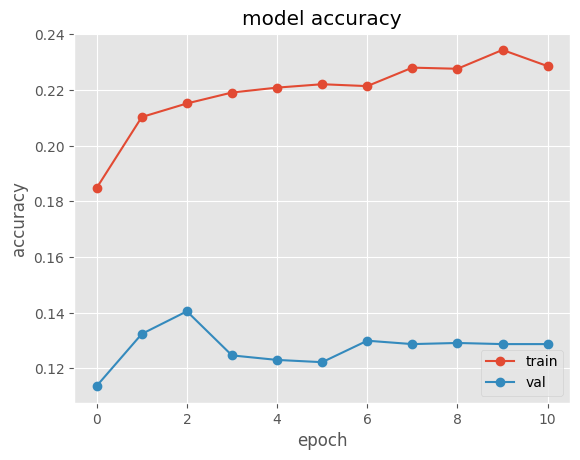

In [22]:
# Visualize the model

plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

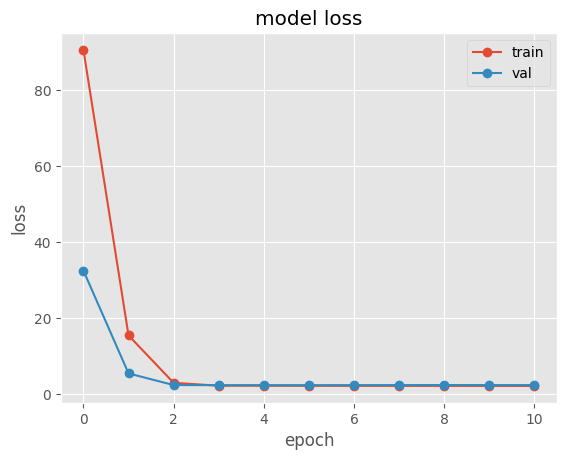

In [23]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi label kelas menggunakan model terhadap data uji
predictions = model.predict(testdata)
predicted_classes = np.argmax(predictions, axis=1)

# Ambil label sebenarnya dari data uji
true_classes = testdata.labels

# Dapatkan nama kelas
class_labels = list(testdata.class_indices.keys())

# Buat classification matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification matrix
print("Classification Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step
Classification Matrix:
[[  0   0   0 148   0   0   0   0   0   0]
 [  0   0   0 217   0   0   0   0   0   0]
 [  0   0   0 236   0   0   0   0   0   0]
 [  0   0   0 302   0   0   0   0   0   0]
 [  0   0   0 242   0   0   0   0   0   0]
 [  0   0   0 318   0   0   0   0   0   0]
 [  0   0   0 233   0   0   0   0   0   0]
 [  0   0   0 249   0   0   0   0   0   0]
 [  0   0   0 242   0   0   0   0   0   0]
 [  0   0   0 279   0   0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

    bathroom       0.00      0.00      0.00       148
     bedroom       0.00      0.00      0.00       217
      dining       0.00      0.00      0.00       236
      gaming       0.12      1.00      0.22       302
     kitchen       0.00      0.00      0.00       242
     laundry       0.00      0.00      0.00       318
      living       0.00      0.00      0.00       233
      office       0.00      0.00      0.00     

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy adalah rasio dari jumlah prediksi yang benar (true predictions) dibagi dengan jumlah total instance dalam dataset. 

Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini dihitung sebagai rasio dari true positive (TP) dibagi oleh jumlah true positive dan false positive (FP). 

 Recall mengukur seberapa baik model dalam menemukan semua instance yang benar dari kelas yang diinginkan. Ini dihitung sebagai rasio dari true positive (TP) dibagi oleh jumlah true positive dan false negative (FN). 

F1-score adalah rata-rata harmonik dari precision dan recall. Ini memberikan keseimbangan antara precision dan recall.